# STOCK SHARE PRICE PREDICTION USING LINEAR REGRESSION AND RANDOMFOREST
##### BEST STOCKS RECOMMENDED BY FROBES https://www.forbes.com/advisor/investing/best-stocks-to-buy-now/
##### We will begin by accessing and evaluating top 4 stocks recommended by frobes
- SPOT (SPOTIFY)
- PGR (PROGRESSIVE)
- GOOG (ALPHABET)
- ISRG (INTUITIVE)
---
## The objective is to find lowest risk stock and sneak peek 5 days into the future prices by our best scoring model
---

### We will start by performing analysis on the top 4 stocks recommended by frobes
1. First we need historical datasets for which we will use [yfinance] yahoo finance library  
2. Secondly we will use [pandas] to observe, analyse and manipulate datasets
3. Thirdly we want to visualize and measure returns and risk of stocks using [matplotlib] and [seaborn] libraries
4. By this point we will have a good idea of which of these 4 stock is the best suited for safe investment and promising returns.

### Modeling
- We will use linear regression and random forest models
- We will use the historical data of the selected stocks to train the models
- We will use the trained models to predict the stock price of the selected stocks

### We'll be answering the following questions along the way:
- [ ] What was the change in price over time?
- [ ] What was the daily return on average?
- [ ] What was the moving average?
- [ ] What was the correlation between different stocks?
- [ ] How much value do we put at risk by investing in a particular stock?
- [ ] How can we attempt to predict future stock behavior?
- [ ] How can we predicting the closing price of a stock using linear regression and random forest models?
- [ ] Which Model performed best by Score?
- [ ] Which one of these is the best stock to invest in based on our analysis?
- [ ] How can we use our prediction models to make informed investment decisions?

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


['SPOT', 'PGR', 'GOOG', 'ISRG']

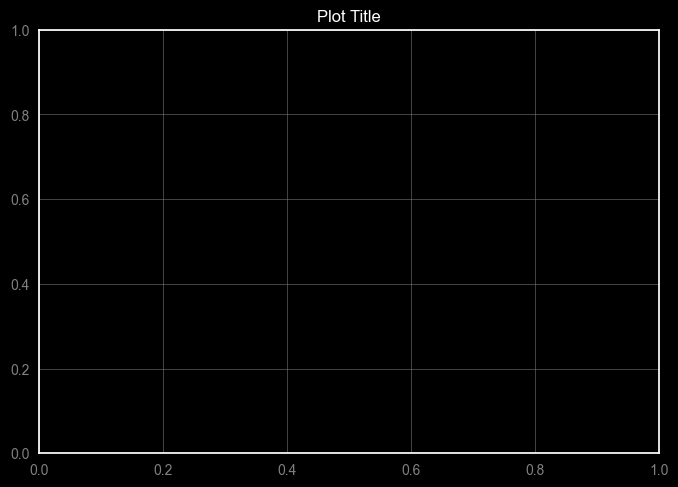

In [214]:
%matplotlib inline
%pip install yfinance
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from pycaret.regression import setup, create_model, tune_model, evaluate_model, compare_models
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Set dark mode style
plt.style.use('dark_background')

# Customize gridlines, axes, and title colors
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.75)
plt.gca().xaxis.label.set_color('grey')
plt.gca().yaxis.label.set_color('grey')
plt.gca().tick_params(colors='grey')
plt.title('Plot Title', color='white')

# List of stocks
stock_list = ['SPOT', 'PGR', 'GOOG', 'ISRG']

# Full names of stock companies
company_name = ["SPOTIFY", "PROGRESSIVE", "ALPHABET", "INTUITIVE"]

# Setting-up end and start for data fetching
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

# Download stock data
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

stock_list

In [172]:
SPOT

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-06,223.589996,232.899994,222.529999,232.020004,232.020004,1036800
2021-10-07,233.009995,238.410004,232.800003,234.899994,234.899994,661700
2021-10-08,235.500000,238.369995,232.339996,232.880005,232.880005,625100
2021-10-11,233.869995,236.580002,230.440002,231.889999,231.889999,647300
2021-10-12,232.809998,235.750000,231.500000,235.300003,235.300003,651400
...,...,...,...,...,...,...
2024-09-30,369.049988,373.380005,366.250000,368.529999,368.529999,1553300
2024-10-01,370.489990,375.660004,367.929993,375.399994,375.399994,1565900
2024-10-02,374.459991,377.368011,371.529999,374.750000,374.750000,1504500


In [173]:
# Concatination of lists to get one dataframe with all stocks
company_list = [SPOT, PGR, GOOG, ISRG]

for data, com_name in zip(company_list, company_name):
    data["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [174]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-15,85.989998,86.841003,83.709999,85.110001,85.110001,1326200,SPOTIFY
2022-01-27,131.360992,132.609955,128.945007,129.121002,128.804672,30248000,ALPHABET
2022-01-04,360.000000,362.000000,352.570007,354.630005,354.630005,1310900,INTUITIVE
2023-03-10,92.500000,93.180000,90.800003,91.010002,90.787048,32850100,ALPHABET
2024-08-15,476.869995,480.540009,474.160004,480.170013,480.170013,1599900,INTUITIVE
2023-11-24,316.950012,318.260010,316.000000,318.010010,318.010010,601300,INTUITIVE
2024-05-10,169.690002,171.339996,167.910004,170.289993,169.872818,18740500,ALPHABET
2023-06-09,122.559998,124.285004,122.419998,122.870003,122.568993,20304500,ALPHABET
2023-08-16,133.020004,137.229996,131.500000,136.139999,135.180008,6249900,PROGRESSIVE


In [175]:
# Data summary
sk.skim(df)
# sns.pairplot(df, hue='company_name', diag_kind='kde', palette='inferno')

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3016   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open         │   0 │    0 │     193 │    93.54 │  71.93 │   123.4 │   154.6 │    253.9 │    493.5 │ ▇▅▃▂▁  │  │
│ │ High         │   0 │    0 │   195.5 │    94.46 │  72.33 │     125 │     157 │    256.5 │    496.5 │ ▇▅▃▂▁  │  │
│ │ Low          │   0 │    0 │   190.5 │    92.44 │  69.29 │   121.8 │   152.8 │    250.6 │    489.2 │ ▇▅▃▂▁  │  │
│ │ Close        │   0 │    0 │     193 │    93.49 │  71.05 │   123.3 │   154.6 │    254.3 │      494 │ ▇▅▃▂▁  │  │
│ │ Adj Close    │   0 │    0 │   192.7 │    93.72 │  71.05 │   122.7 │   154.3 │    254.2 │      494 │ ▇▅▃▂▁  │  │
│ │ Volume       │   0 │    0 │ 7783000 │ 11200000 │ 499100 │ 1538000 │ 2207000 │ 10460000 │ 97800000 │   ▇▂   │  │
│ └──────────────┴─────┴──────┴─────────┴──────────┴────────┴─────────┴─────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ company_name               │      0 │          0 │                            1 │                     3016 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# [X] What was the change in price over time?

#### What is the Differnce between Adjusted Closing Price & Closing Price?
- Closing Price: The final price a stock trades at during a trading day.
- Adjusted Closing Price: The closing price adjusted for corporate actions (splits, dividends, rights offerings) to provide a more accurate representation of the stock's value.

#### Why is the adjusted closing price important?
- Accurate historical comparisons: When analyzing a stock's performance over time, the adjusted closing price provides a more accurate picture by accounting for corporate actions that could have artificially inflated or deflated the price.   
Fair valuation: It helps investors compare the value of a stock with other stocks, even if they have undergone different corporate actions.


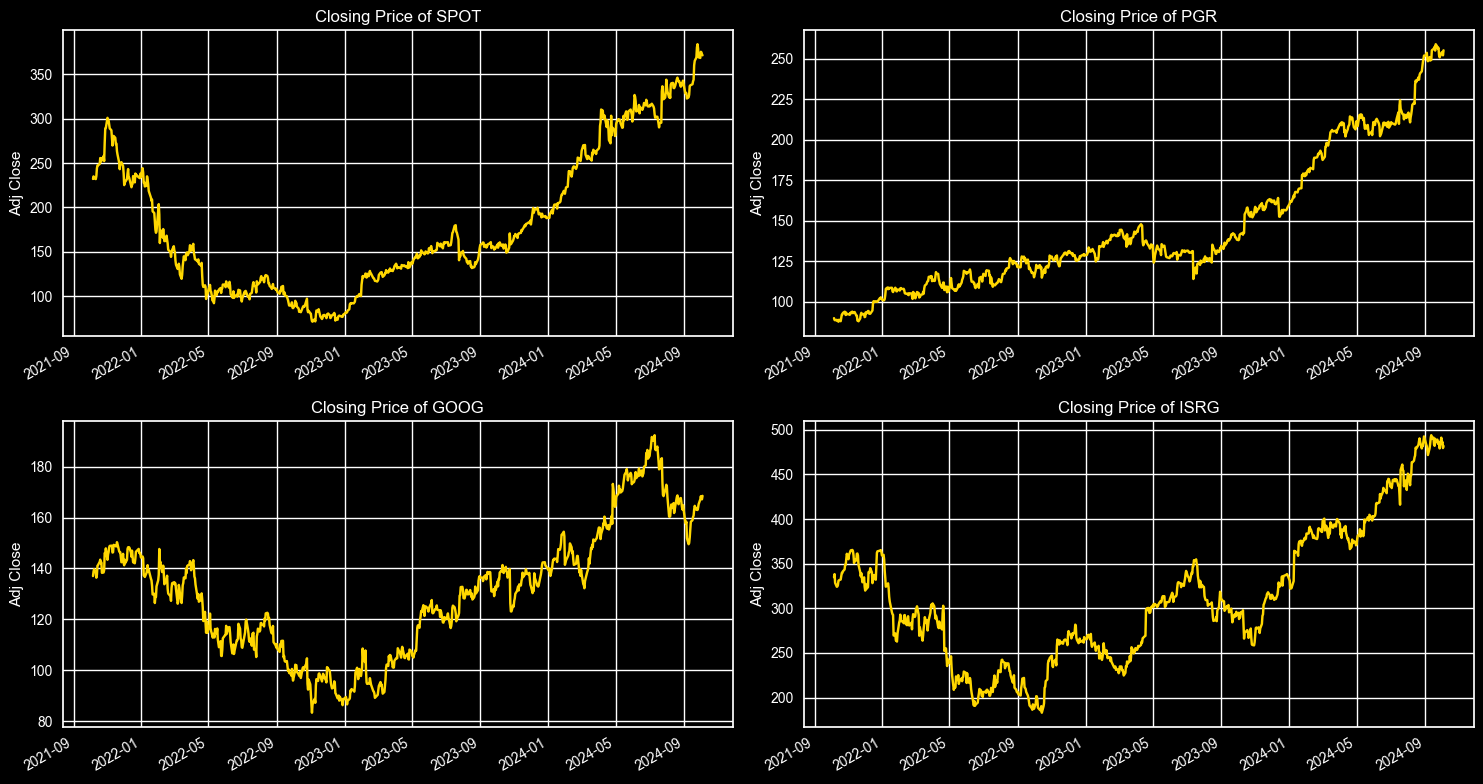

In [176]:
# Now ploting the closing price of all selected stocks

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='gold')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

#### What is Trading Volume?

- Trading volume is a measure of the number of shares traded during a specific time period. It provides insight into the level of market activity and investor interest in a particular security.
- For example, if a stock has a high trading volume, it indicates that many investors are actively buying and selling the stock.

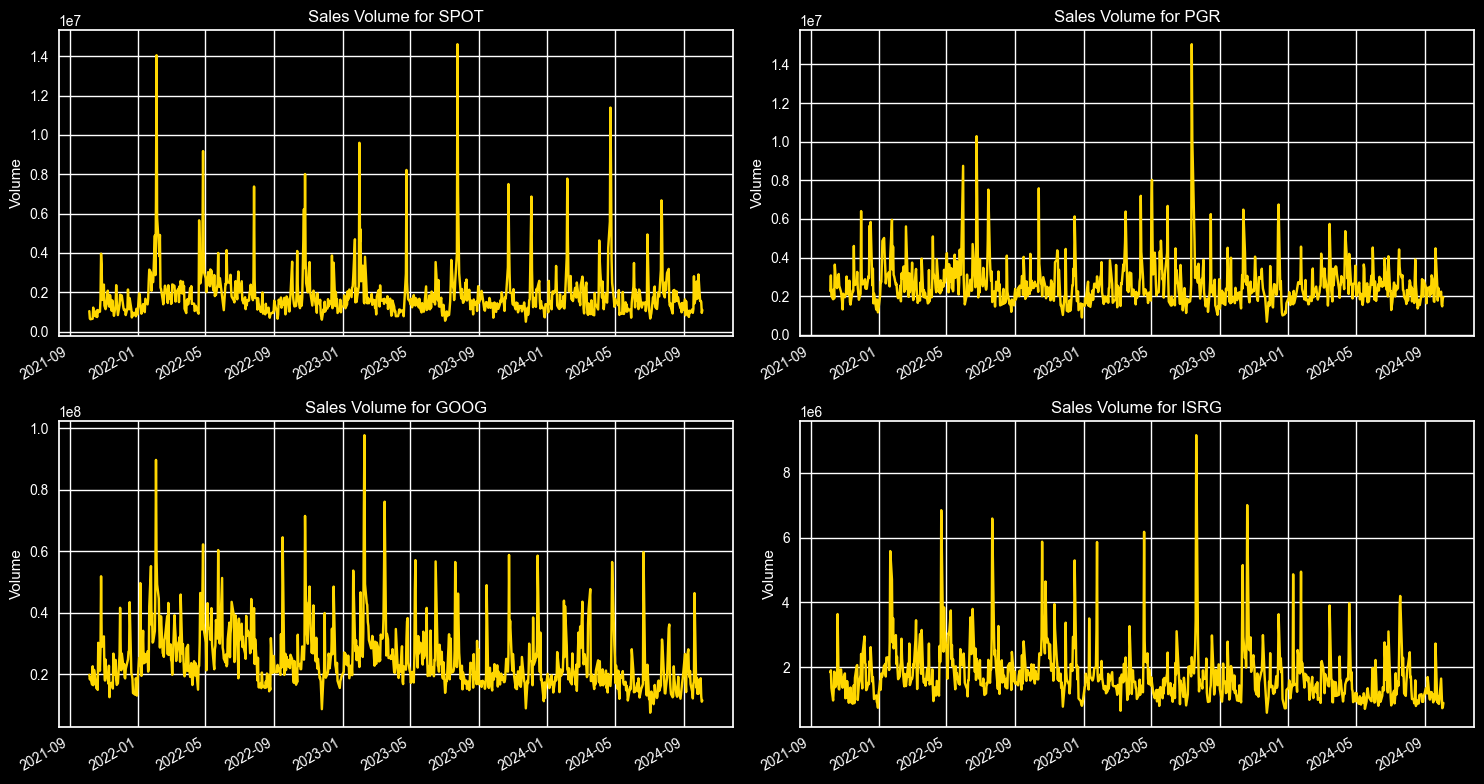

In [177]:
# Lets see total volume of selected stock being traded daily

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='gold')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

# [X] What was the moving average?

### The Most Popular Crossovers are the Golden Cross and Death Cross, A Golden Cross happens when the 50-day and 200-day moving averages make a crossover when pointing upwards.
- Golden Cross (Golden Cross Up): A Golden Cross occurs when a shorter-term moving average crosses above a longer-term moving average. This pattern is often seen as a bullish (positive) signal, indicating that the trend of the stock is likely to continue upward. It suggests that the stock is experiencing a period of strength and may be a good investment opportunity.
- Death Cross (Golden Cross Down): A Death Cross occurs when a shorter-term moving average crosses below a longer-term moving average. This pattern is often seen as a bearish (negative) signal, indicating that the trend of the stock is likely to reverse and move downward. It suggests that the stock is experiencing a period of weakness and may be a good time to sell or reduce holdings.
##### These patterns are used by technical analysts to identify potential trend reversals and make trading or investment decisions based on the information provided by the moving averages. However, it's important to note that these patterns alone do not guarantee future price movements and should be used in conjunction with other technical and fundamental analysis.

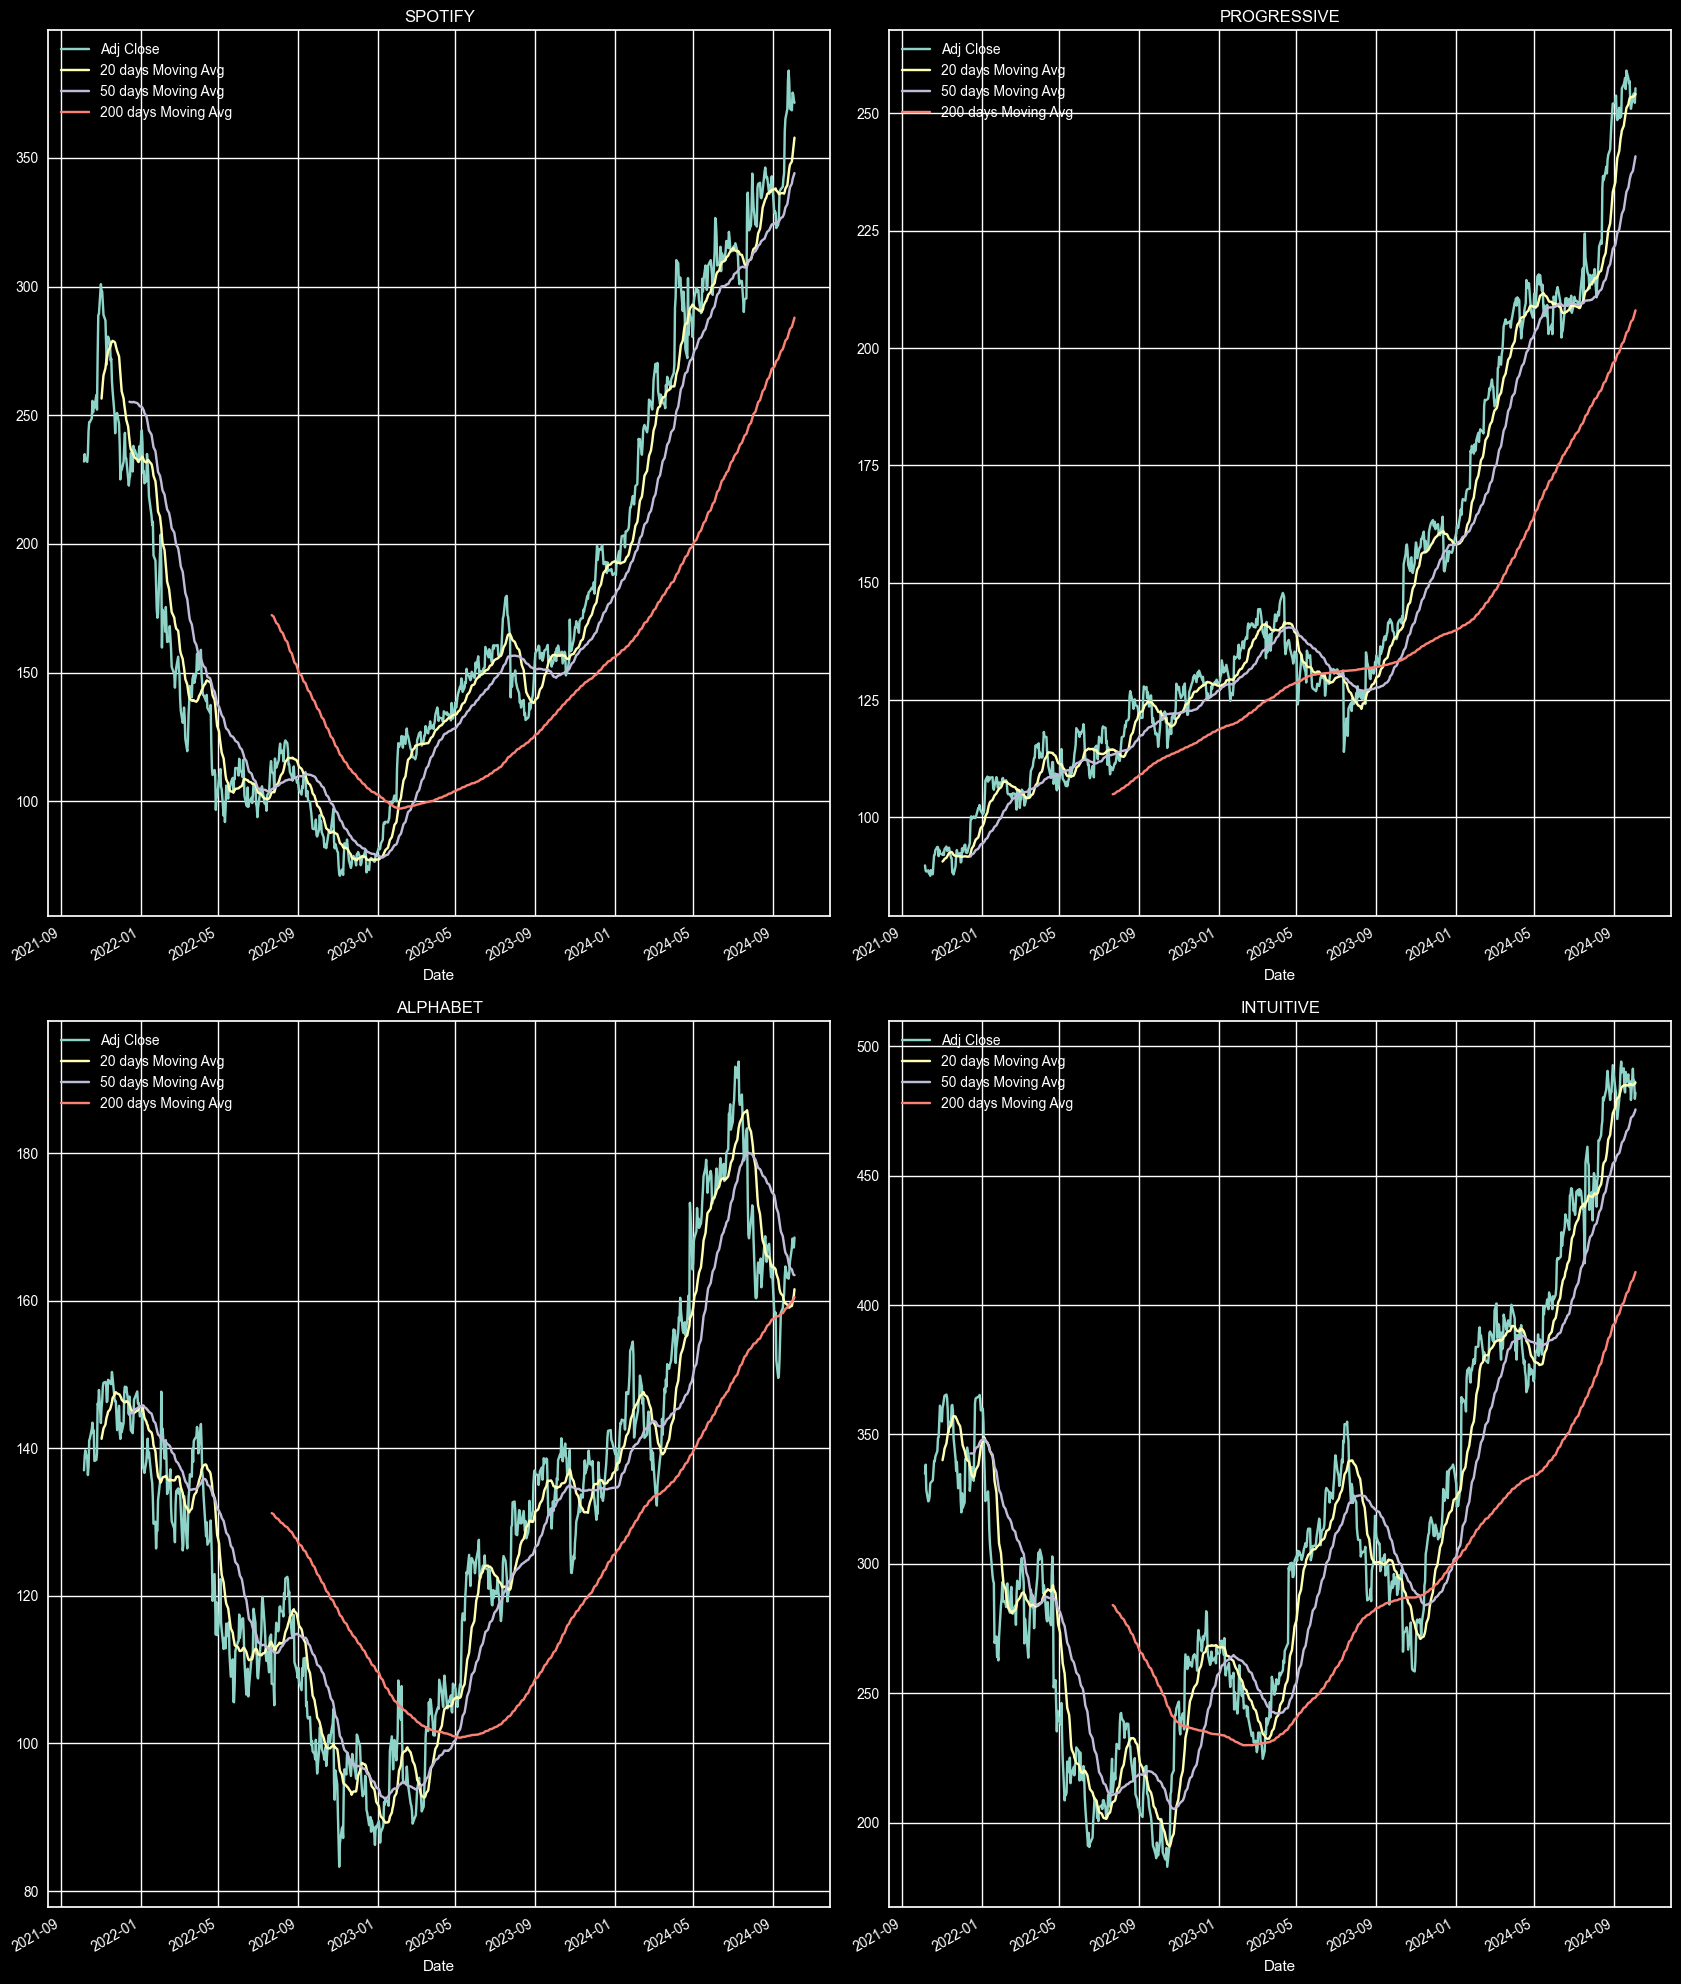

In [178]:
# Analysing Trends and Crossovers
#=====================================

ma_day = [20, 50, 200]   # Moving Average periods


for ma in ma_day:
    for company in company_list:
        column_name = f"{ma} days Moving Avg" # col names by days
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(17)

# SPOT PGR GOOG ISRG
# SPOTIFY PROGRESSIVE ALPHABET INTUITIVE

SPOT[['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0,0], linestyle='-')
axes[0,0].set_title('SPOTIFY')

PGR[['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[0,1], linestyle='-')
axes[0,1].set_title('PROGRESSIVE')

GOOG[['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1,0], linestyle='-')
axes[1,0].set_title('ALPHABET')

ISRG[['Adj Close', '20 days Moving Avg', '50 days Moving Avg', '200 days Moving Avg']].plot(ax=axes[1,1], linestyle='-')
axes[1,1].set_title('INTUITIVE')

fig.tight_layout()

# [X] What was the daily return on average?

### TOP 4 Benifits of observing daily returns by percentage
* *Risk Assessment*: By analyzing daily returns, you can assess the risk associated with a particular investment or portfolio. Higher volatility in daily returns may indicate higher risk.
* *Trend Identification*: Daily returns can help identify trends in the market, such as upward or downward movements. This information can be used to make informed investment decisions.
* *Volatility Measurement*: Daily returns can be used to measure volatility, which is essential for options pricing, risk management, and portfolio optimization.
* *Investment Decision Making*: By analyzing daily returns, you can make informed investment decisions, such as buying or selling assets based on their performance.

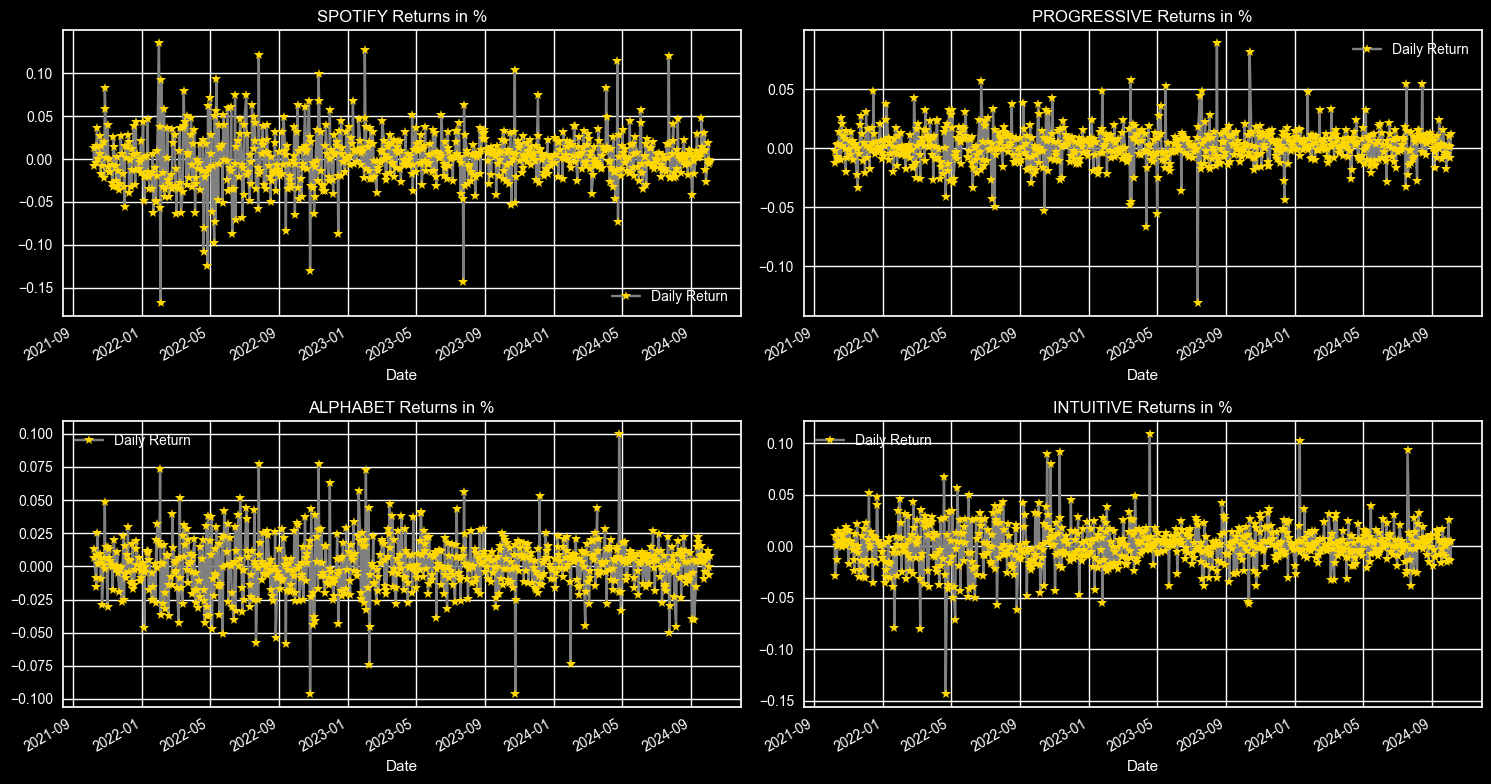

In [179]:
# Apply pct_change to find the change pct for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot the daily return pct with a dark theme
#plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

SPOT['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 0].set_title('SPOTIFY Returns in %')

PGR['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[0, 1].set_title('PROGRESSIVE Returns in %')

GOOG['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 0].set_title('ALPHABET Returns in %')

ISRG['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='-', marker='*', markerfacecolor='gold', color='grey')
axes[1, 1].set_title('INTUITIVE Returns in %')

fig.tight_layout()
plt.show()

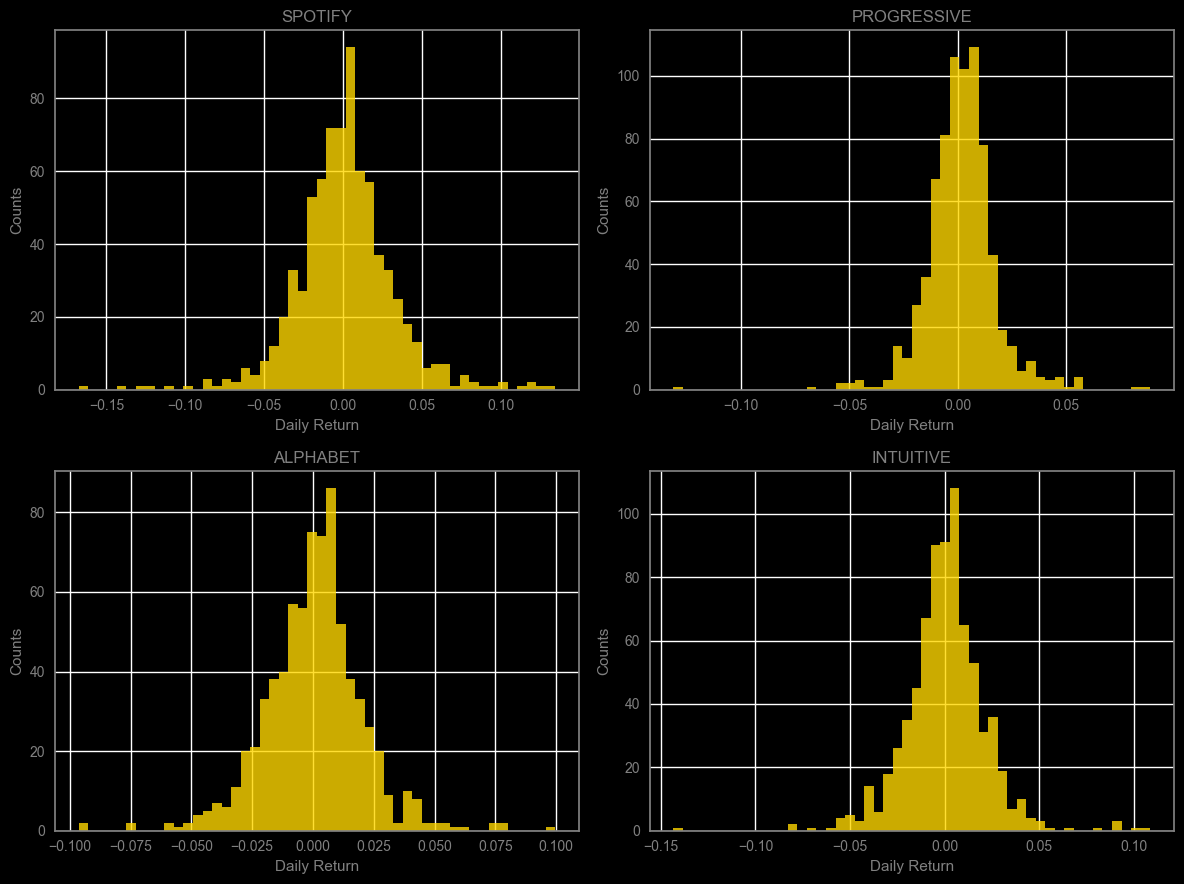

In [180]:
# Set the figure size and background color
plt.figure(figsize=(12, 9), facecolor='black')

# Customize the subplot parameters for a darker theme
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'gray'

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, alpha=0.8, histtype='stepfilled', color='gold', cumulative=False)

    plt.xlabel('Daily Return', color='gray')
    plt.ylabel('Counts', color='gray')
    plt.title(f'{company_name[i - 1]}', color='gray')

plt.tight_layout()

In [181]:
# Download stock data
data = yf.download(stock_list, start, end)

# Extract adjusted closing prices
closing_prices = data['Adj Close']

# Calculate daily returns pct
Stock_returns = closing_prices.pct_change()

Stock_returns.head()


[*********************100%***********************]  4 of 4 completed


Ticker,GOOG,ISRG,PGR,SPOT
Date,,,,
2021-10-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2021-10-07 00:00:00+00:00,0.013334,0.010151,-0.012247,0.012413
2021-10-08 00:00:00+00:00,0.006254,-0.028965,-0.002304,-0.008599
2021-10-11 00:00:00+00:00,-0.008629,-0.013271,0.002969,-0.004251
2021-10-12 00:00:00+00:00,-0.015373,0.000833,-0.007456,0.014705


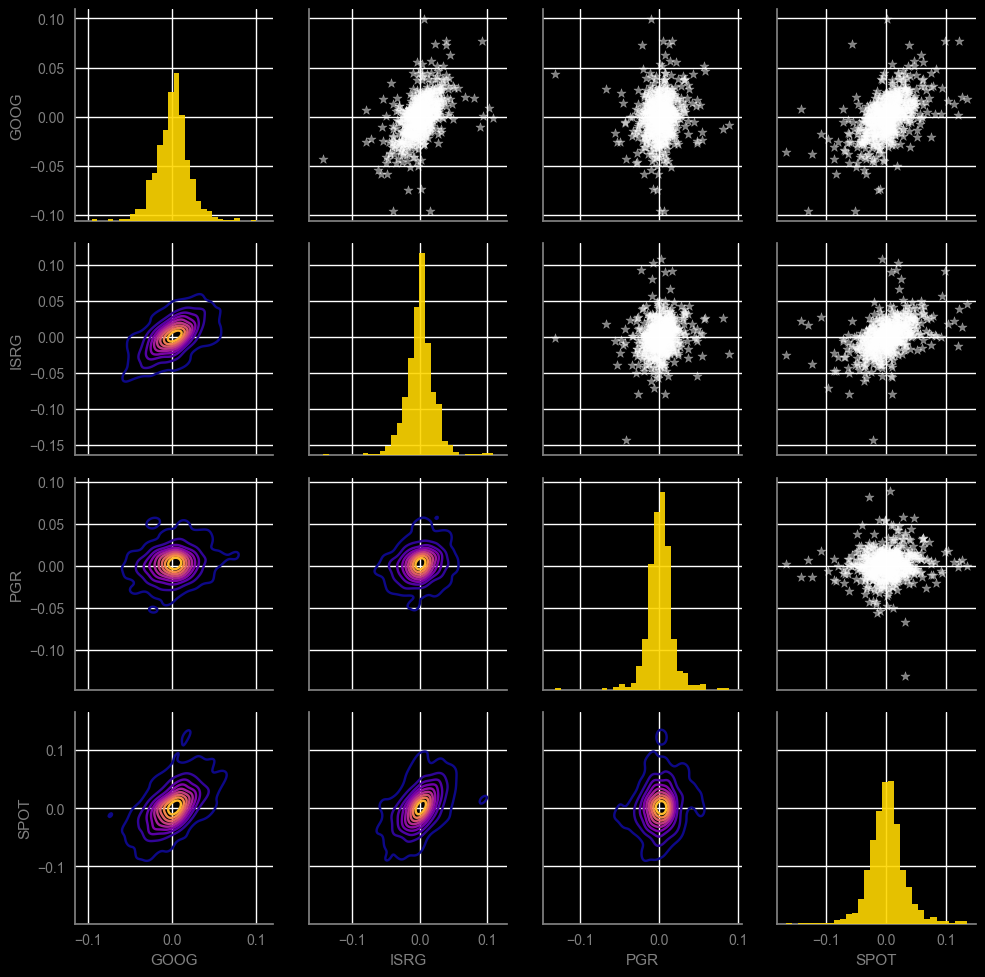

In [182]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


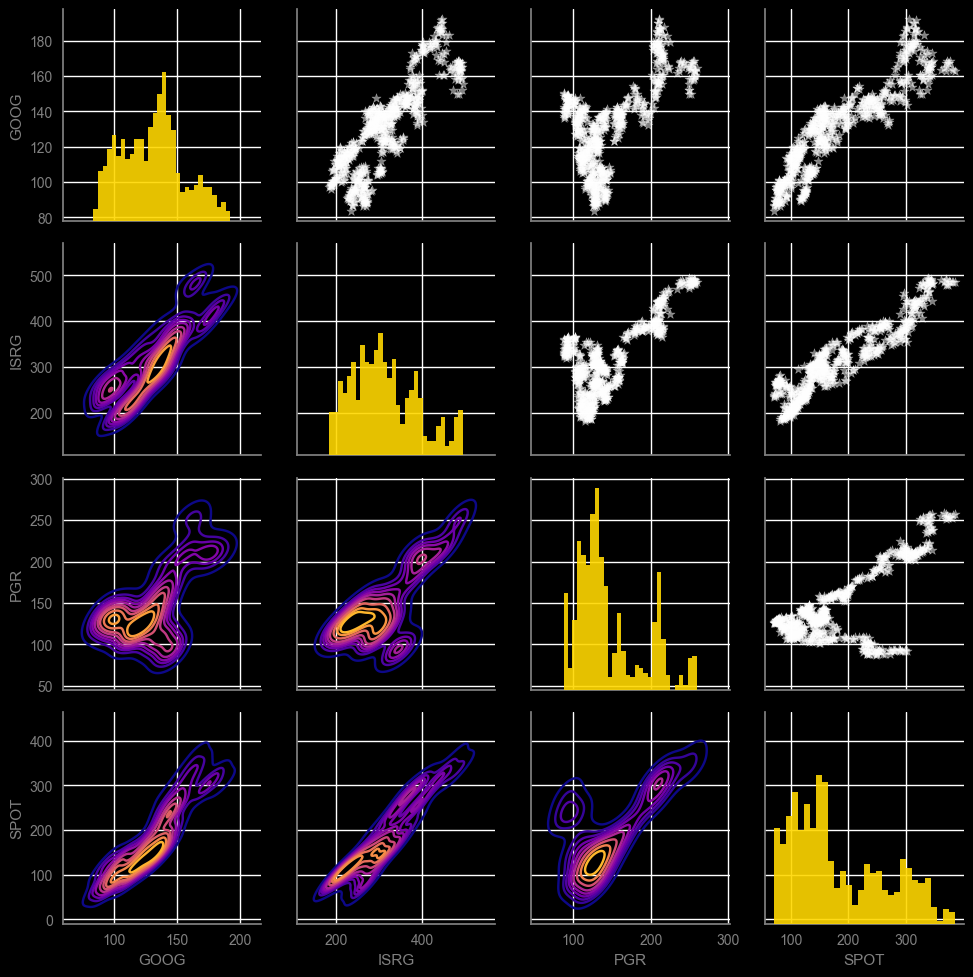

In [183]:
# Lets see how it looks when we view actual daily returns directly by [closing_price] from downloaded table
# ====================== 
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_prices.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='white', alpha=0.5, marker='*')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
return_fig.map_lower(sns.kdeplot, cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30, alpha=0.9, color='gold')


# [X] What was the correlation between different stocks?

### Finally!! Uncovering Hidden Relationships: Correlation Plot
- Revealing Numerical Correlation Values between Stocks Daily Returns
- By creating a correlation plot, we can gain a deeper understanding of the relationships between the daily return values of different stocks. This plot allows us to visualize the correlation between the stocks and obtain actual numerical values for the correlation.

Text(0.5, 1.0, 'Correlation of stock closing price')

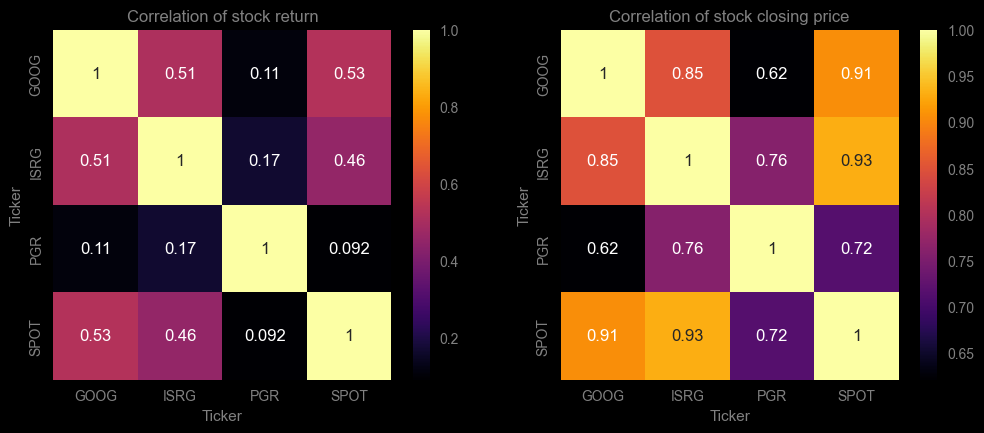

In [184]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(Stock_returns.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='inferno')
plt.title('Correlation of stock closing price')

## First Look at Google and Spotify
- Upon examining the closing prices, we notice a fascinating relationship between Google and Spotify. This correlation plot provides valuable insights into the connections between these two stocks, enabling us to make more informed investment decisions.

## Correlation of Stock Return (pct)
- Here we see [Google] and [Spotify] have a strong correlation, while [Progressive] and Spotify have the lowest correlation.
- This means that when Google's stock price goes up, Spotify's stock price is likely to go up as well, but when Progressive's stock price goes up, Spotify's stock price is likely to go down.

## Correlation of closing price (act)
- Here we see [Intuitive] and [Spotify] have a storng correlation, while [Progressive] and Google have the lowest correlation.
- This means that when Intuitive's stock price goes up, Spotify's stock price is likely to go up as well, but when Progressive's stock price goes up, Intuitive's stock price is likely to go down.

## Initial Conclusion
- The analysis shows that positive correlation dependancies between these 4 companies evolve around SPOTIFY =   *Intuitive* + *Google*
- Hence , we can conclude that Spotify is likely to be positively correlated with its tech buddies Intuitive and Google, and less related by Progressive since its an insurance company.
---

### NOT SO FAST!! One more step before we can take informed decision, What about Risk Assesment?
# [X] How much value do we put at risk by investing in a particular stock?
#### Quantifying  the risk a fundamental approch: (Expected Return vs. Standard Deviation)
* One of the most straightforward methods to measure risk is by analyzing the relationship between the expected return and the standard deviation of daily returns.
* This approach provides a basic yet effective way to quantify risk, utilizing the data we've collected on daily percentage returns.
 

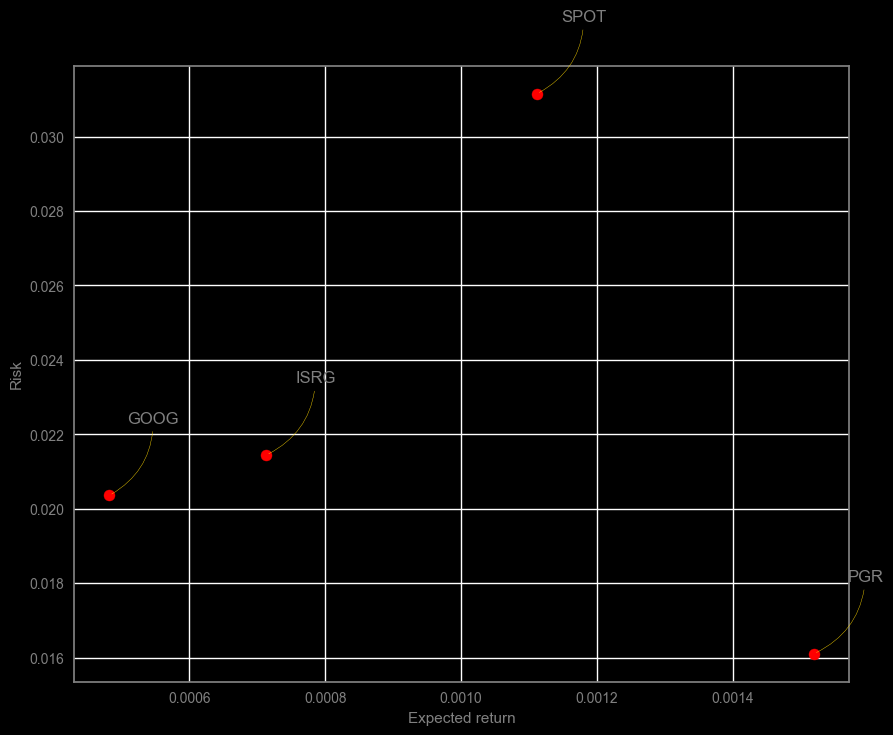

In [185]:
rets = Stock_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, color='red')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='gold', connectionstyle='arc3,rad=-.3'))

* This clears the air, see how three tech companies Spotify Intuitive and Google are aligned with climbing risk factors, due to high dependancies we have seen in our correlation matrix we now can relate to high volitility in volumn which we observed earlier which is only good for small short term gains. Howevver Progressive as an insurance company is not aligned with any of the tech companies and has a low correlation with all of them. PGR proven to have the lowest RISK and ability to produce highhest RETURN, This is good for long term investments as it is less volatile and has a lower risk factor.

# [X] Which one of these is the best stock to invest in based on our analysis?

### PGR aka Progressive is a good long term investment

* Now we have to take a deep dive in to PGR and identify any hidden patterns.

In [186]:
# Get the stock between periods 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, max

ticker = "PGR"
data = yf.download(ticker, period="10y") # get data for last 10 years

[*********************100%***********************]  1 of 1 completed


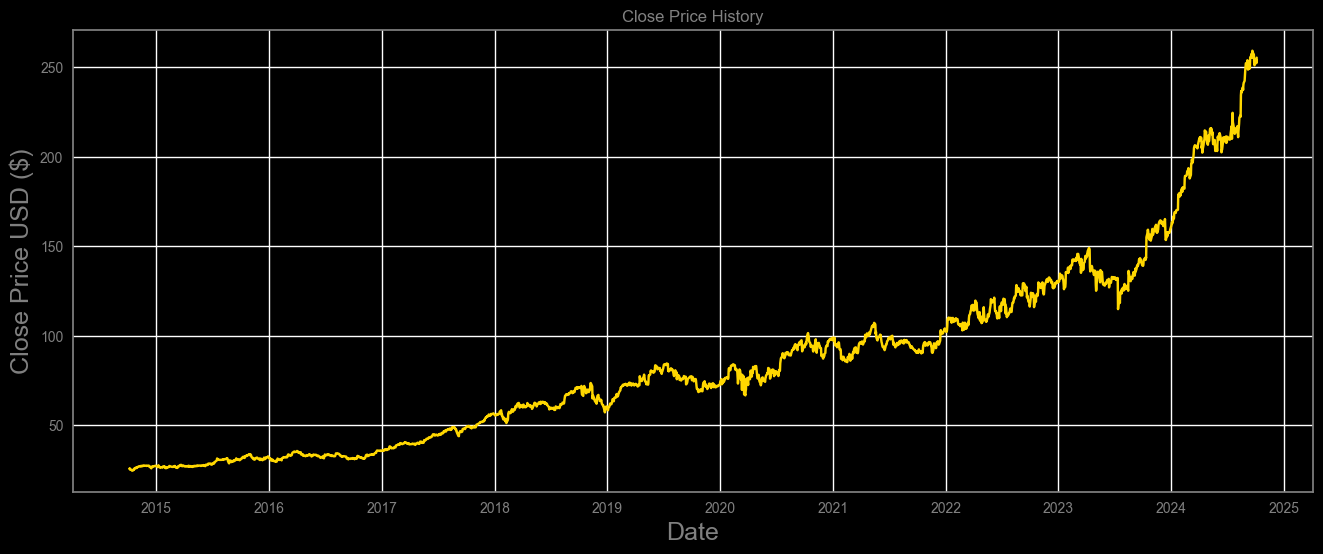

In [187]:
# Create a new dataframe with only the 'Close column 
df = data.filter(['Close'])

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], color='gold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

* We want to visually analyze the relationship between a time series a specific point in time and its values at previous time steps (lags). We want to look for patterns in these lag plots, you can potentially identify trends, correlations, or seasonality within the data. Having multiple lag plots side-by-side allows for quick comparison at different lag intervals.

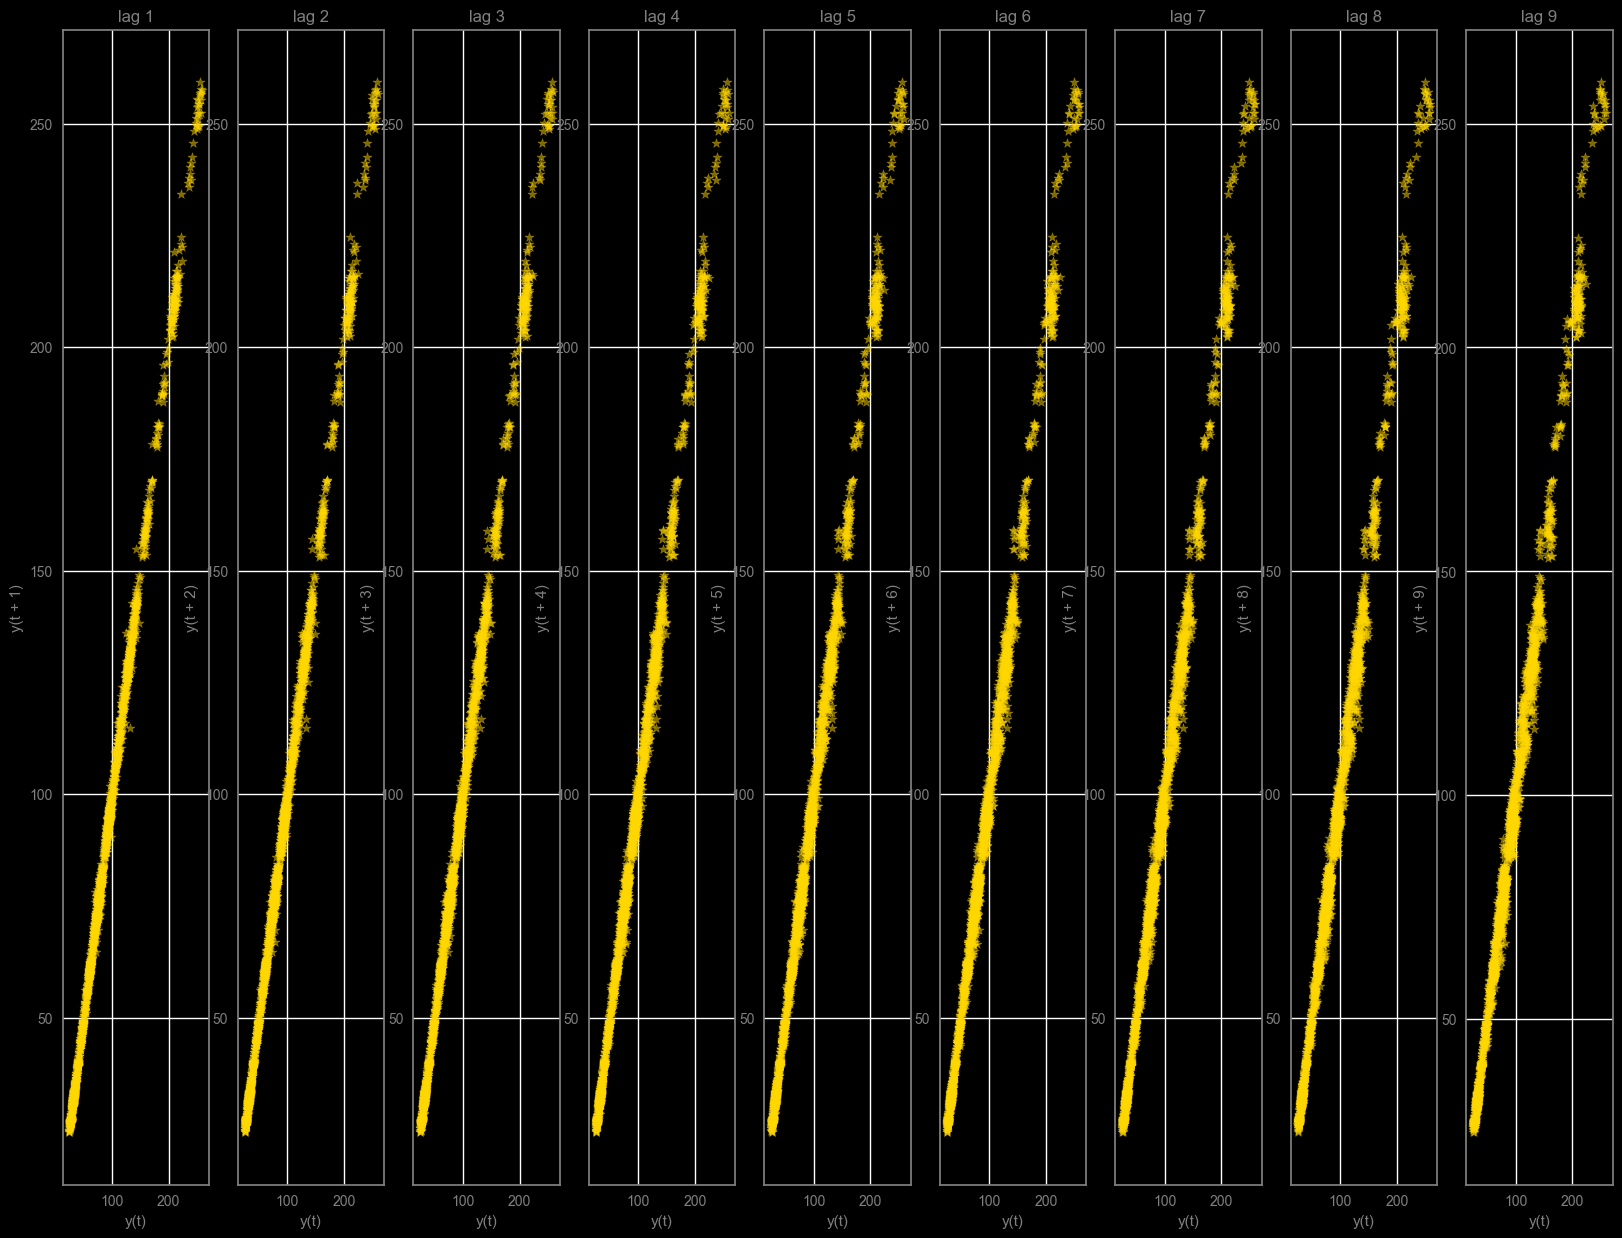

In [188]:
# setting up time lag plots

fig, axs = plt.subplots(ncols=9, figsize=(20,15)) # setting 9
for ax, i in zip(axs.flat, range(1,10)): # setting 10
    pd.plotting.lag_plot(df, lag=i, ax=ax, alpha=0.5, c='gold', marker='*')
    ax.set_title('lag '+ str(i) )

plt.show()

Text(0.5, 0, 'lags')

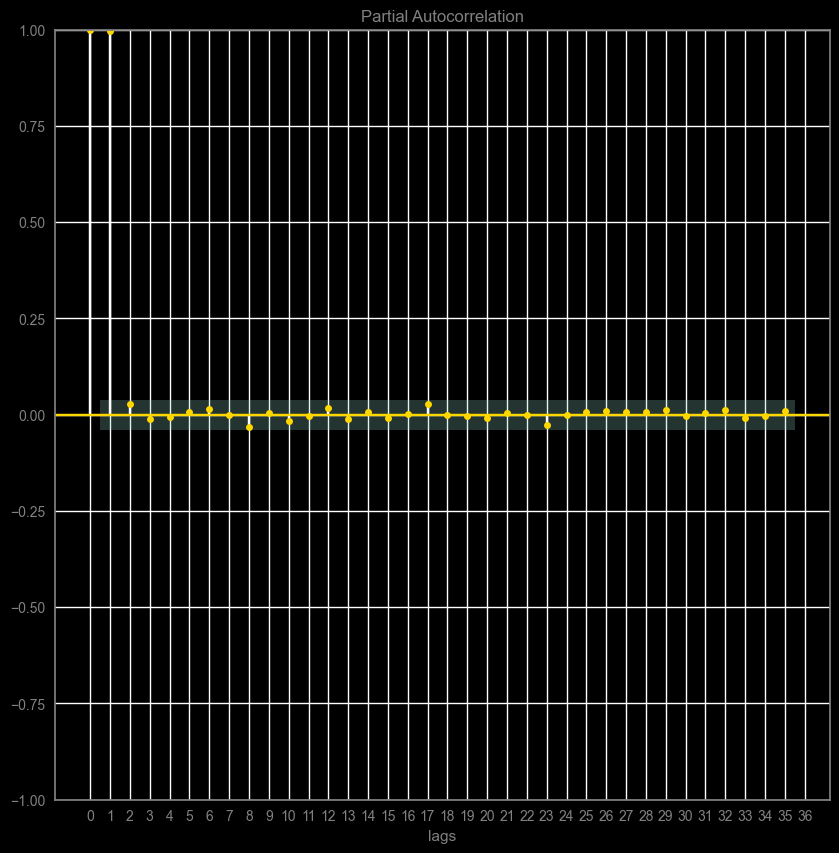

In [189]:
from statsmodels.graphics.tsaplots import plot_pacf
_, ax = plt.subplots(figsize=(10, 10))
plot_pacf(df.dropna(), ax=ax, method='ywm', color='gold')
ind = [i for i in range(37)]
ax.set_xticks(ind)
ax.set_xlabel('lags')

* The PACF is a statistical tool used to analyze the presence of significant autocorrelations at different lags in a time series. By plotting the PACF, you can identify lags where past values have a statistically significant correlation with the current value. This information is valuable for tasks like model selection in time series forecasting. It helps you determine the appropriate number of lags to include when building a model to capture the relationship between past and future values in the data.

In [190]:
X = df.copy()
X['lag1'] = X['Close'].shift(1)
X['lag2'] = X['Close'].shift(2)
X['lag8'] = X['Close'].shift(8)
X['lag17'] = X['Close'].shift(17)
X['lag23'] = X['Close'].shift(23)
X

,Close,lag1,lag2,lag8,lag17,lag23
Date,,,,,,
2014-10-06,25.600000,NaN,NaN,NaN,NaN,NaN
2014-10-07,25.240000,25.600000,NaN,NaN,NaN,NaN
2014-10-08,25.650000,25.240000,25.600000,NaN,NaN,NaN
2014-10-09,25.270000,25.650000,25.240000,NaN,NaN,NaN
2014-10-10,25.000000,25.270000,25.650000,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-09-30,253.759995,251.100006,252.380005,257.660004,249.539993,245.570007
2024-10-01,254.270004,253.759995,251.100006,255.300003,248.690002,248.259995
2024-10-02,254.429993,254.270004,253.759995,259.239990,251.309998,250.009995


## Using Linear Regression Model for Price prediction

In [191]:
# Cleaning the data
X = X.fillna(method='ffill')
X = X.drop(['Close'], axis=1)
X = X.fillna(0)
X

,lag1,lag2,lag8,lag17,lag23
Date,,,,,
2014-10-06,0.000000,0.000000,0.000000,0.000000,0.000000
2014-10-07,25.600000,0.000000,0.000000,0.000000,0.000000
2014-10-08,25.240000,25.600000,0.000000,0.000000,0.000000
2014-10-09,25.650000,25.240000,0.000000,0.000000,0.000000
2014-10-10,25.270000,25.650000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2024-09-30,251.100006,252.380005,257.660004,249.539993,245.570007
2024-10-01,253.759995,251.100006,255.300003,248.690002,248.259995
2024-10-02,254.270004,253.759995,259.239990,251.309998,250.009995


In [192]:
y = df['Close'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [193]:
y_pred = model.predict(X_train)
y_fore = model.predict(X_test)
y_pred = pd.Series(y_pred, index=y_train.index)
y_fore = pd.Series(y_fore, index=y_test.index)

Text(0.5, 1.0, 'Actual and Prediction')

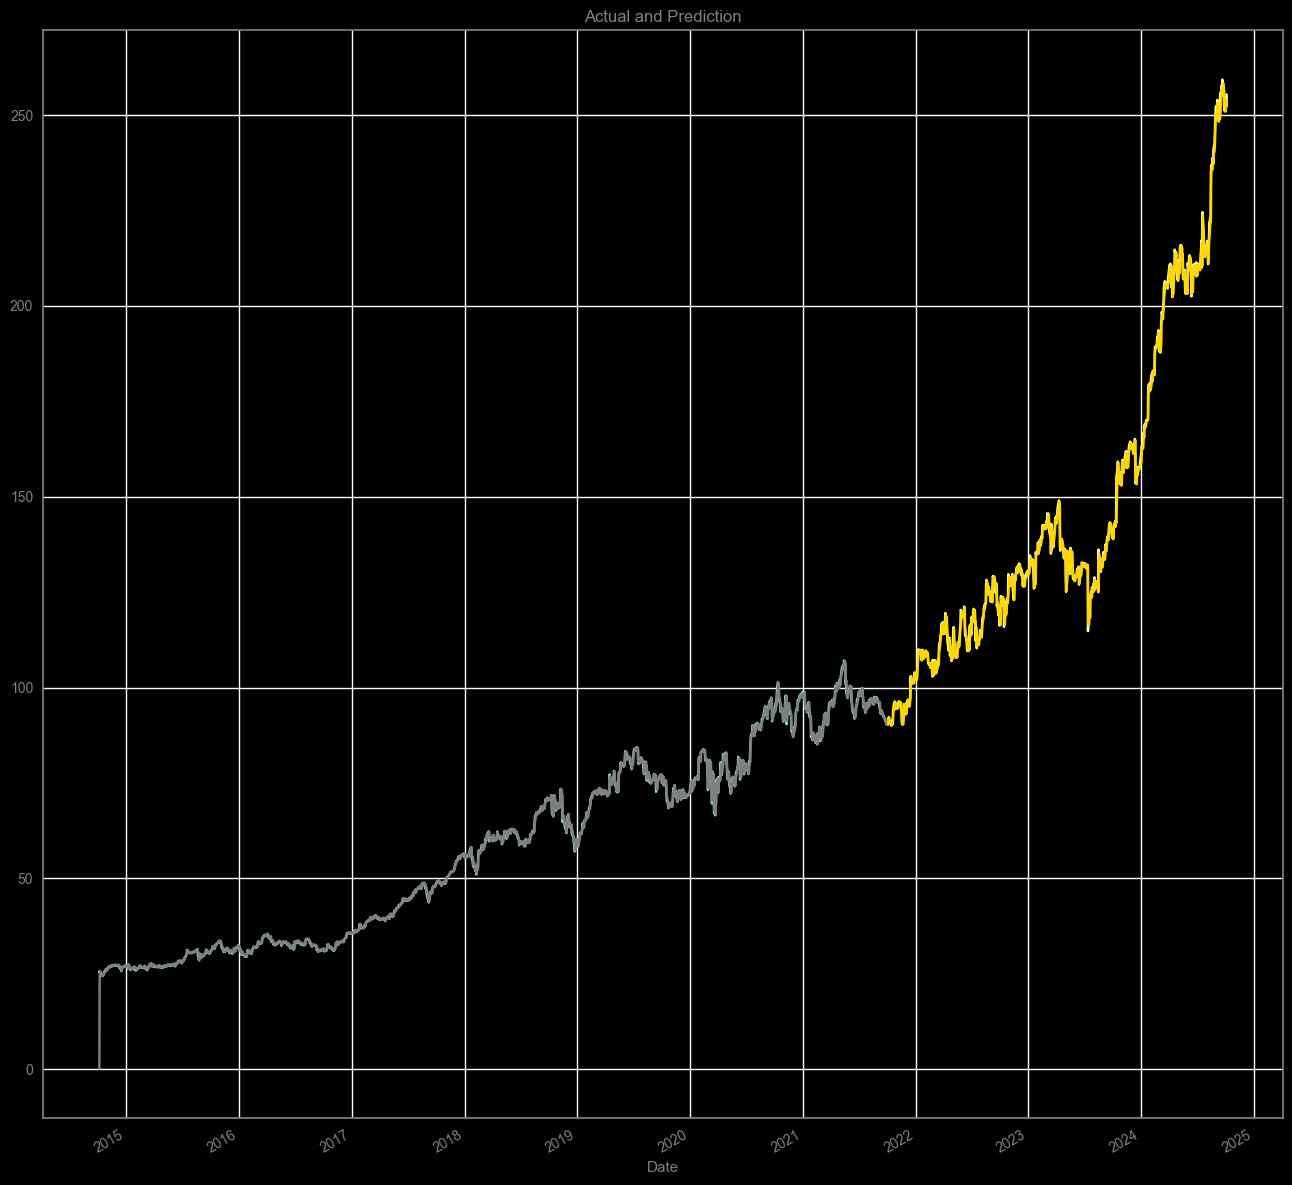

In [194]:
# Plot Actual V/s Prediction
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax, color='GREY', figsize=(16,16)) #p training set
_ = y_fore.plot(ax=ax, color='gold', figsize=(16,16)) #p test set 
ax.set_title('Actual and Prediction')

Text(0.5, 1.0, 'Test over Prediction')

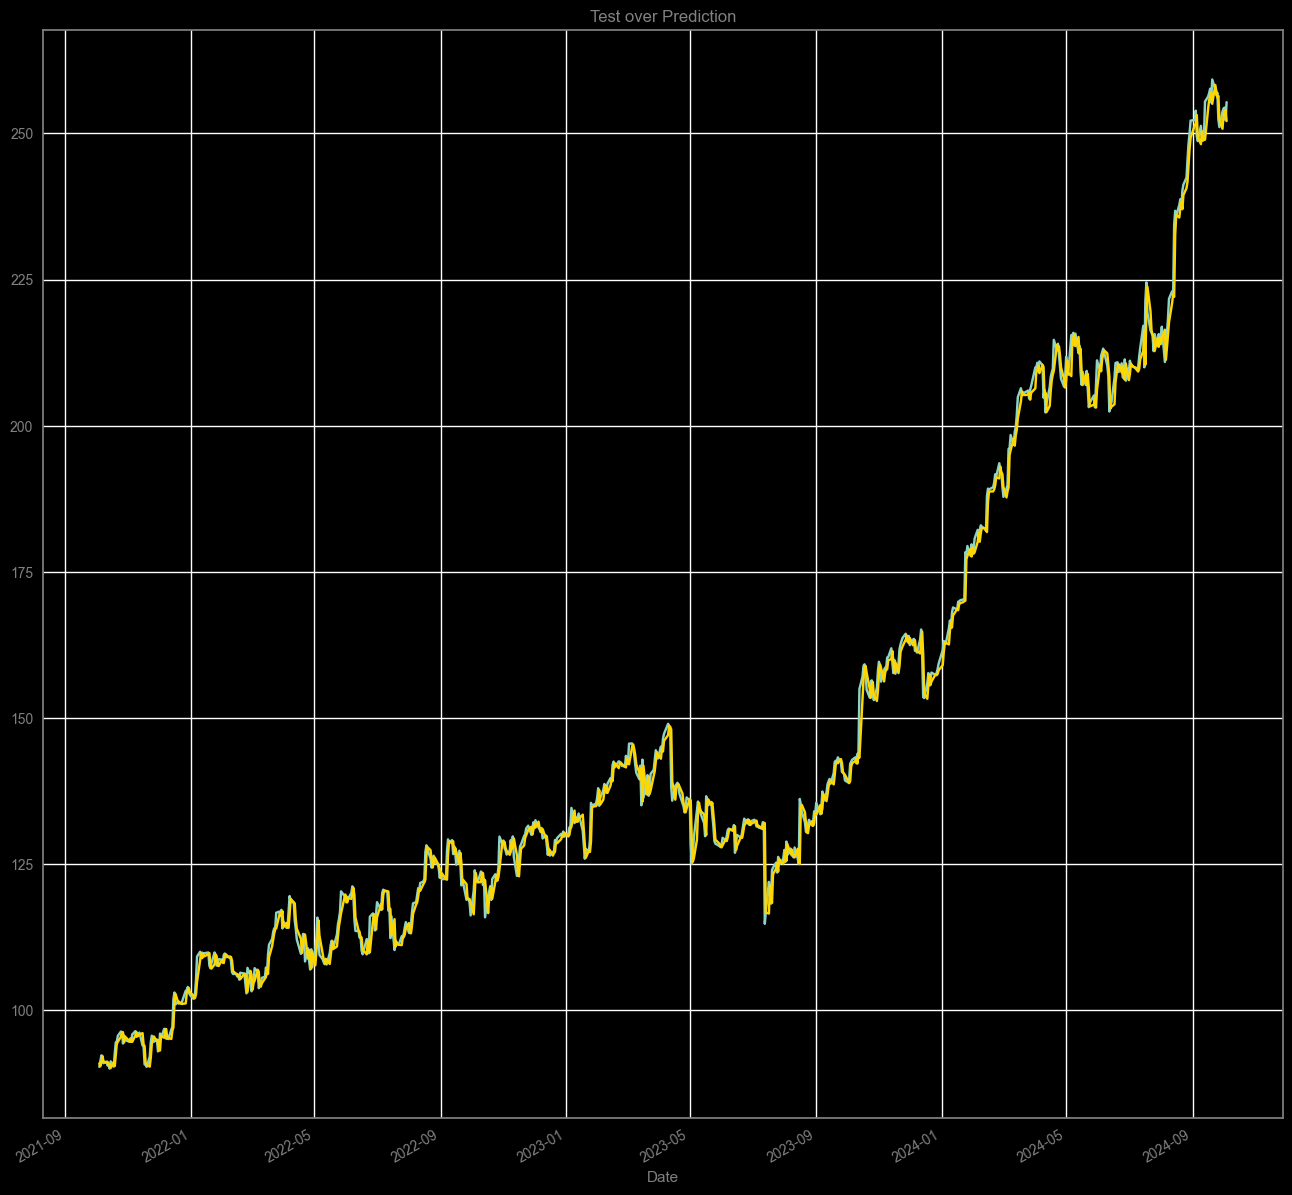

In [195]:
# Plot test vs prediction side by side
ax = y_test.plot()
_ = y_fore.plot(ax=ax, color='gold', figsize=(16, 16))
ax.set_title('Test over Prediction')

### Score

In [196]:
lr_mse = mean_squared_error(y_train, y_pred)
lr_r2 = r2_score(y_test, y_fore)
score_linear = model.score(X_train, y_train)  # Only call this once

print(lr_mse)
print(lr_r2)
print(score_linear)

1.3461181203712922
0.9969417197648228
0.9977183511448201


In [197]:
train_rmse = mean_squared_error(y_train,y_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_fore, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 1.16
Test RMSE: 2.32


# [X] How can we attempt to predict future stock behavior?

In [198]:
# Forecasting
last_data = X_test.iloc[-1].values.reshape(1, -1)  # last row of test data
future_predictions = [] # list of future prices
predicted_prices = []  # list of predicted prices

for _ in range(5):
    next_price = model.predict(last_data)[0]
    future_predictions.append(next_price)
    predicted_prices.append(next_price)
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_price

# Date range for the predictions
future_dates = pd.date_range(start=df.index[-1], periods=6, freq='B') # work days

# DataFrame for the predicted prices
future_df = pd.DataFrame(data=future_predictions, index=future_dates[1:], columns=['Predicted Price'])

# P Prices
print("Future predicted prices:")
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: {price:.2f}")

Future predicted prices:
Day 1: 252.13
Day 2: 254.28
Day 3: 255.39
Day 4: 249.55
Day 5: 251.89


In [199]:
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Price']])
print(combined_data)


2024-09-23    257.600006
2024-09-24    256.540009
2024-09-25    256.989990
2024-09-26    252.380005
2024-09-27    251.100006
2024-09-30    253.759995
2024-10-01    254.270004
2024-10-02    254.429993
2024-10-03    252.270004
2024-10-04    255.360001
2024-10-07    252.128845
2024-10-08    254.283600
2024-10-09    255.389153
2024-10-10    249.553808
2024-10-11    251.890699
dtype: float64


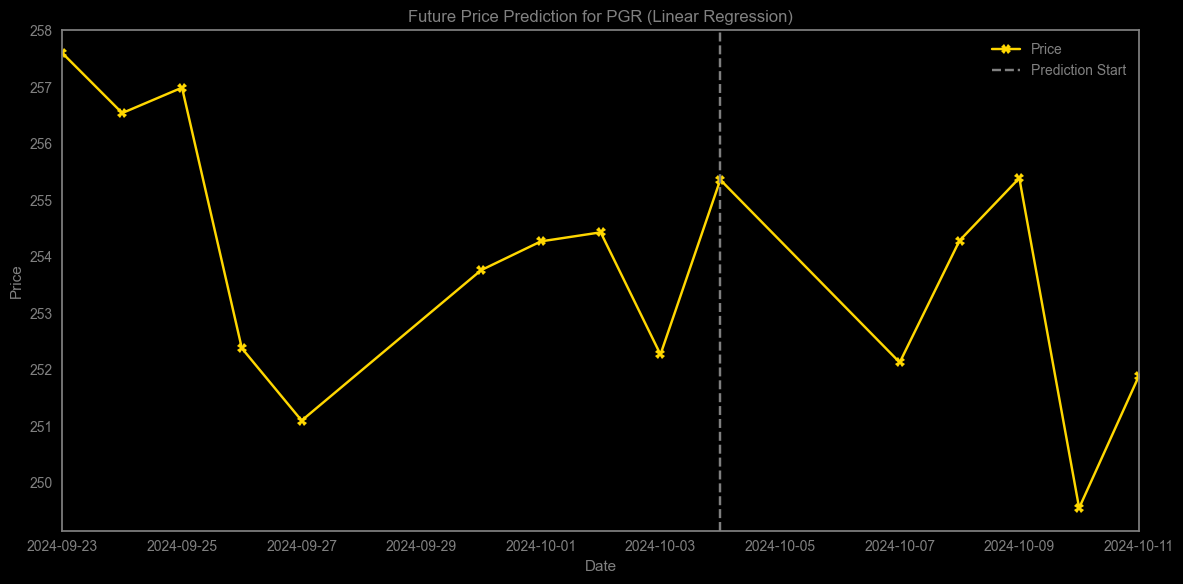

In [200]:
# Plotting

plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data, label='Price', color='gold', marker='X')
plt.axvline(x=df.index[-1], color='grey', linestyle='--', label='Prediction Start')

plt.title('Future Price Prediction for PGR (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim(combined_data.index[0], combined_data.index[-1])  # Set x-axis days
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

- We see price is expected to drop as far as 250 hence the downtrend follows 

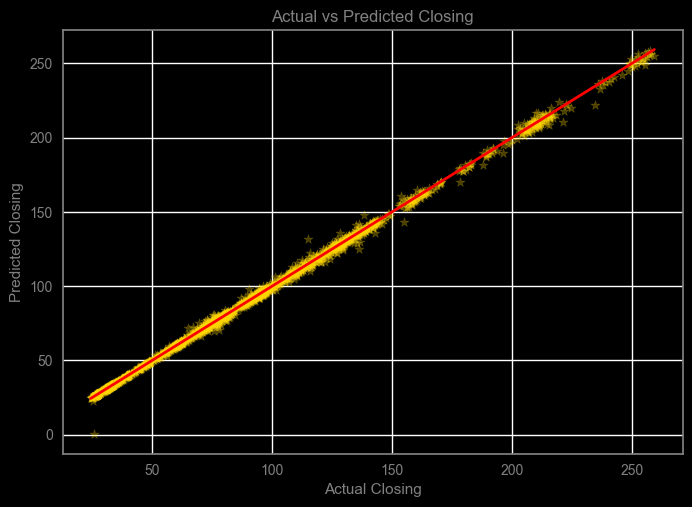

In [201]:
#Predict the values
y_pred = model.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='GOLD', alpha=0.3, marker='*')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Closing')
plt.ylabel('Predicted Closing')
plt.title('Actual vs Predicted Closing')
plt.show()

## Using RandomForest Regression Model for Price prediction

In [202]:
ticker = "PGR"
df = yf.download(ticker, period="10y")

[*********************100%***********************]  1 of 1 completed


In [203]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop('Close', axis=1)
y = df['Close']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=0, min_samples_split=10, min_samples_leaf=4, max_depth=50)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=0)

In [204]:
y_pred = model.predict(X_train)
y_fore = model.predict(X_test)
y_pred = pd.Series(y_pred, index=y_train.index)
y_fore = pd.Series(y_fore, index=y_test.index)

### Score

In [205]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
    
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))
print("RMSE: {:.4f}".format(rmse))
print("R2 Score: {:.4f}".format(r2))

MAE: 0.2512
MSE: 0.2049
RMSE: 0.4527
R2 Score: 0.9999


Text(0.5, 1.0, 'ground truth and prediction plot')

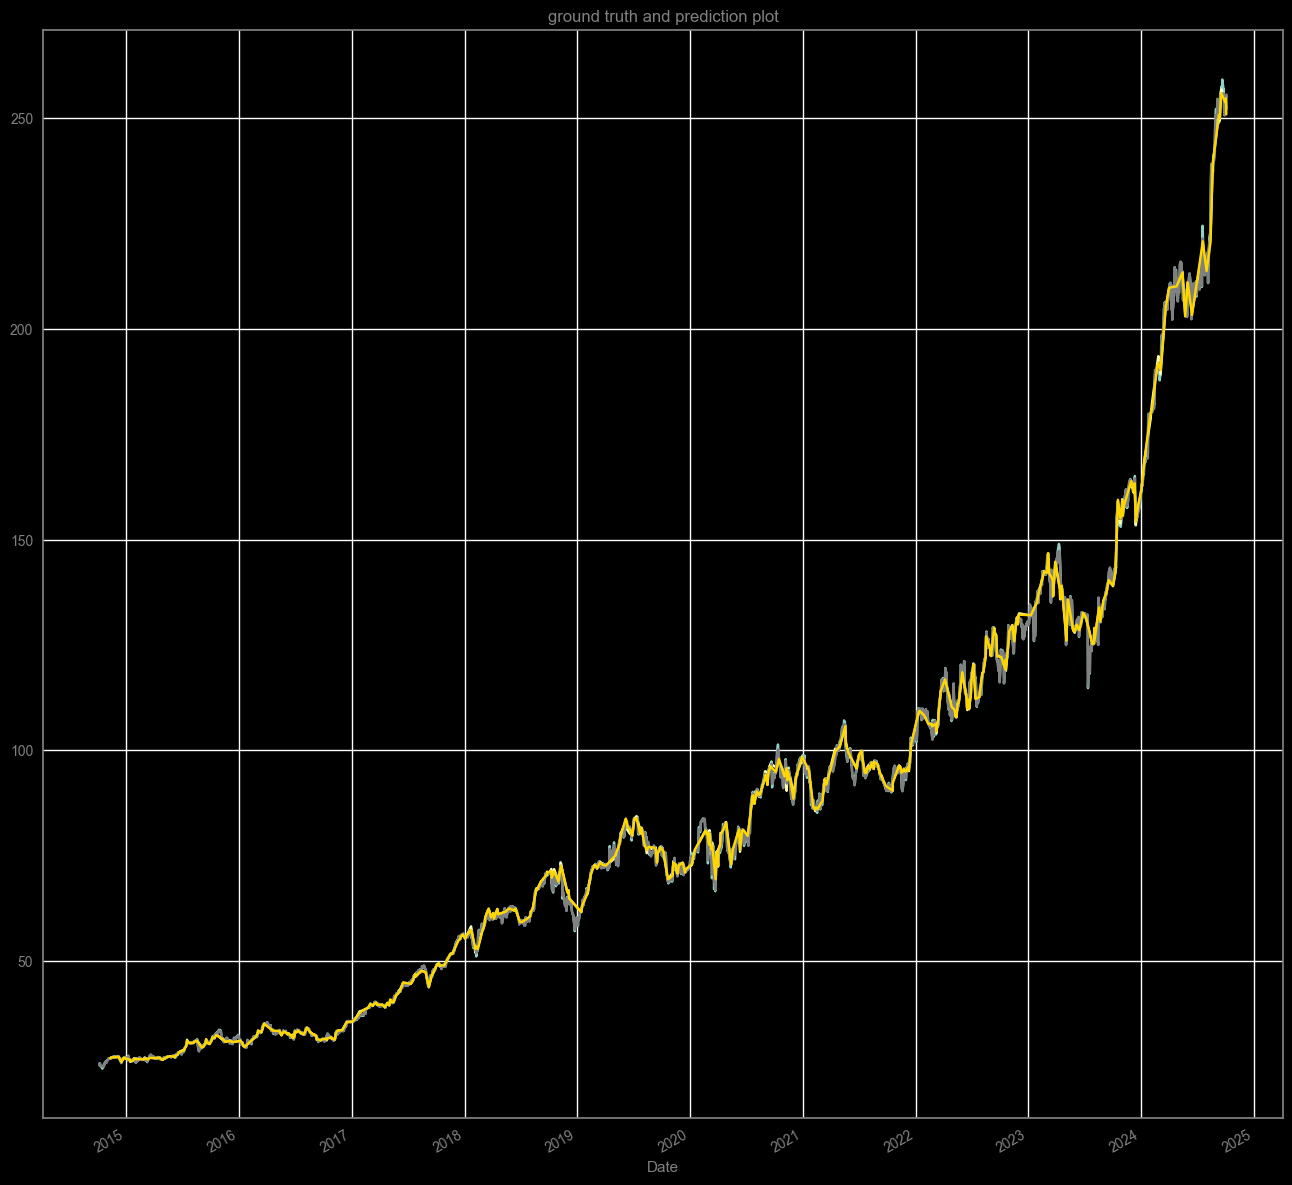

In [206]:
# Plot ground truth and prediction
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax, color='GREY', figsize=(16,16)) #p training set
_ = y_fore.plot(ax=ax, color='gold', figsize=(16,16)) #p test set 
ax.set_title('ground truth and prediction plot')


# [X] How can we attempt to predict future stock behavior?

In [207]:
# Predict the next 5 closing prices
last_row = df.iloc[-1]

# DataFrame to hold the predictions
future_predictions = []

# Predict next 5 days
for _ in range(5):
    # last available data
    next_price = model.predict([last_row[:-1]]) 
    future_predictions.append(next_price[0])
    
    last_row = last_row.shift(-1) 
    last_row['Close'] = next_price[0]

# DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Business
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

print(future_df)

            Predicted Close
2024-10-07       255.683018
2024-10-08       254.887448
2024-10-09       254.910790
2024-10-10       255.209294
2024-10-11       254.947697


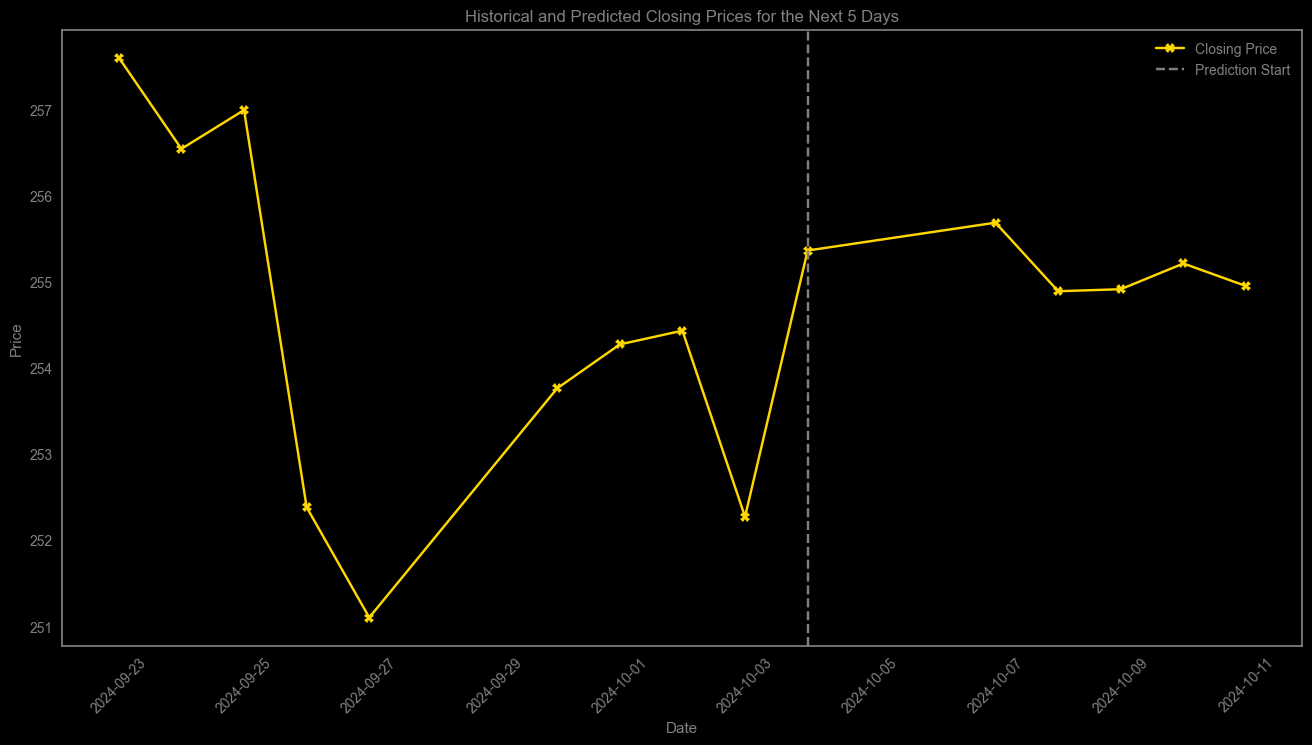

In [208]:
# Plot ground truth and prediction
# After predicting the future prices
# Get the last 10 days of historical closing prices
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Close']])

# Plot historical and predicted closing prices
plt.figure(figsize=(16, 8))
plt.plot(combined_data.index, combined_data, label='Closing Price', color='gold', marker='X')
plt.axvline(x=recent_data.index[-1], color='grey', linestyle='--', label='Prediction Start')
plt.title('Historical and Predicted Closing Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

- Just like our previous linear model predicted We can see here the downtrend continous in the chart. The price is moving lower and lower. The downtrend is getting stronger But we cant see any major dip in coming days as linear model predicted.

## Lets Experiment by using PyCaret to produce Models  

In [215]:
# Get the stock between periods 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, max

ticker = "PGR"
data = yf.download(ticker, period="10y") # get data for last 10 years

[*********************100%***********************]  1 of 1 completed


In [216]:
df = data[['Close']]

# Creating lagged features by using the same feature we used earlier (1, 2, 8, 17, 23)
lags = [1, 2, 8, 17, 23]
for lag in lags:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)


df.dropna(inplace=True)
X = df.drop('Close', axis=1)
y = df['Close']

setup(data=df, target='Close', ignore_features=['Date'], use_gpu = True, verbose=0)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [217]:
# Compare models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.9304,2.4485,1.5410,0.9991,0.0148,0.0104,0.0330
lasso,Lasso Regression,0.9283,2.4492,1.5382,0.9991,0.0148,0.0103,0.0410
br,Bayesian Ridge,0.9305,2.4487,1.5411,0.9991,0.0148,0.0104,0.0160
omp,Orthogonal Matching Pursuit,0.9281,2.4482,1.5370,0.9991,0.0148,0.0103,0.0150
huber,Huber Regressor,0.9284,2.4340,1.5356,0.9991,0.0148,0.0103,0.1190
lar,Least Angle Regression,0.9304,2.4486,1.5410,0.9991,0.0148,0.0104,0.0220
en,Elastic Net,0.9323,2.4488,1.5428,0.9991,0.0148,0.0104,0.0180
ridge,Ridge Regression,0.9304,2.4485,1.5410,0.9991,0.0148,0.0104,0.0300
llar,Lasso Least Angle Regression,0.9284,2.4438,1.5389,0.9991,0.0148,0.0103,0.0120
et,Extra Trees Regressor,1.0332,2.8914,1.6907,0.9989,0.0160,0.0114,0.2510


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [232]:
from pycaret.regression import setup, create_model, predict_model, plot_model,  compare_models
# getting random forest
lr_mod = create_model('lr')
rf_mod = create_model('rf')
# checking accuracy 
predict_model(lr_mod, df.sample(10))
predict_model(rf_mod, df.sample(10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0392,4.2534,2.0624,0.9982,0.0183,0.0113
1,0.8915,1.7956,1.3400,0.9994,0.0142,0.0102
2,0.8028,1.9371,1.3918,0.9993,0.0125,0.0090
3,0.7728,1.4278,1.1949,0.9994,0.0132,0.0096
4,0.7587,1.6636,1.2898,0.9993,0.0126,0.0087
5,0.9208,2.1524,1.4671,0.9993,0.0156,0.0100
6,0.9076,1.8326,1.3537,0.9993,0.0131,0.0102
7,1.1059,3.2897,1.8138,0.9987,0.0165,0.0122
8,1.1192,3.4227,1.8500,0.9989,0.0146,0.0111


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0761,4.3166,2.0776,0.9982,0.0183,0.0118
1,0.9546,2.2176,1.4892,0.9992,0.0161,0.0110
2,0.9039,1.9657,1.4020,0.9993,0.0142,0.0108
3,0.9427,2.4153,1.5541,0.9990,0.0149,0.0110
4,0.9512,2.4142,1.5538,0.9990,0.0149,0.0105
5,1.0581,2.7586,1.6609,0.9992,0.0172,0.0113
6,1.0202,2.4469,1.5642,0.9990,0.0148,0.0114
7,1.1238,3.6335,1.9062,0.9985,0.0174,0.0124
8,1.2027,3.4029,1.8447,0.9989,0.0161,0.0124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.1876,2.8648,1.6926,0.9983,0.0146,0.0119


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0499,2.3562,1.5350,0.9986,0.0142,0.0116


,Close_lag_1,Close_lag_2,Close_lag_8,Close_lag_17,Close_lag_23,Close,prediction_label
Date,,,,,,,
2015-08-18,31.240000,31.030001,30.490000,30.510000,30.180000,31.190001,31.332300
2018-12-12,63.470001,63.650002,65.190002,66.300003,73.120003,64.059998,63.398101
2015-07-21,30.760000,31.280001,29.030001,28.170000,27.870001,30.520000,30.796100
2020-12-21,96.949997,96.309998,93.599998,89.400002,94.930000,97.940002,98.248300
2018-03-06,58.790001,57.580002,56.849998,51.070000,54.099998,58.619999,58.744899
2023-01-19,128.229996,130.690002,134.610001,128.600006,126.580002,125.919998,127.595802
2023-03-03,142.250000,142.229996,142.580002,138.699997,135.399994,145.600006,142.571699
2021-06-28,96.849998,95.690002,92.919998,99.959999,97.279999,97.330002,97.061101
2023-01-18,130.690002,133.649994,131.529999,129.119995,128.279999,128.229996,131.422699


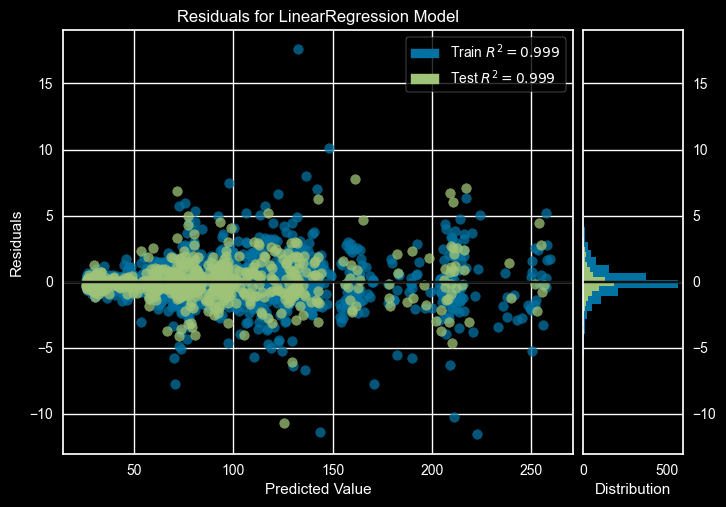

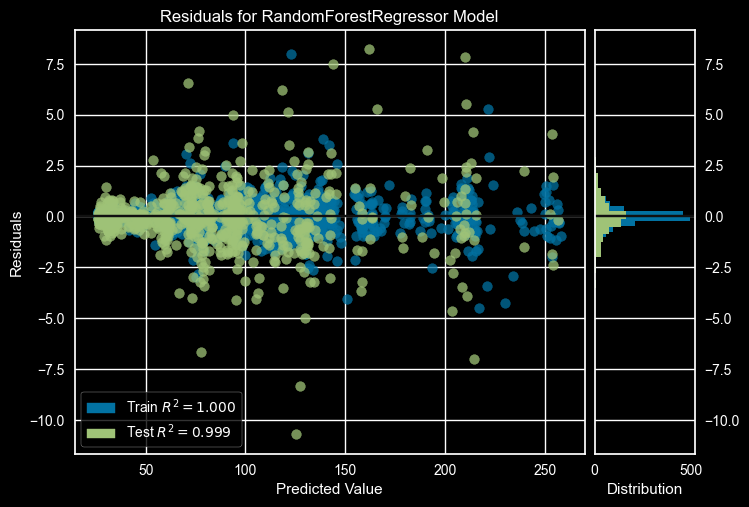

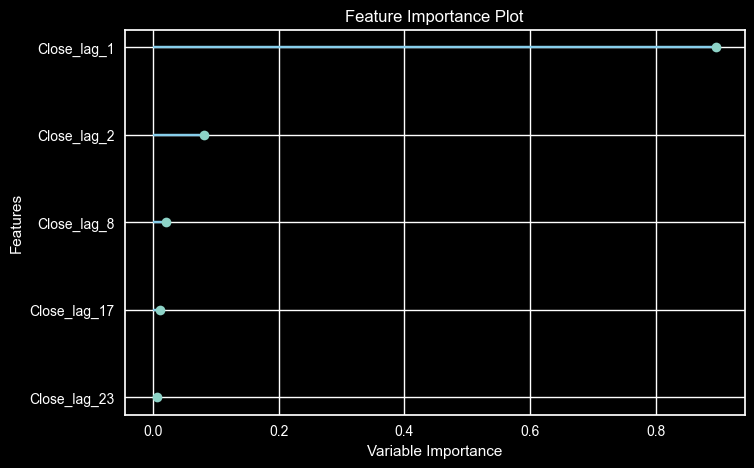

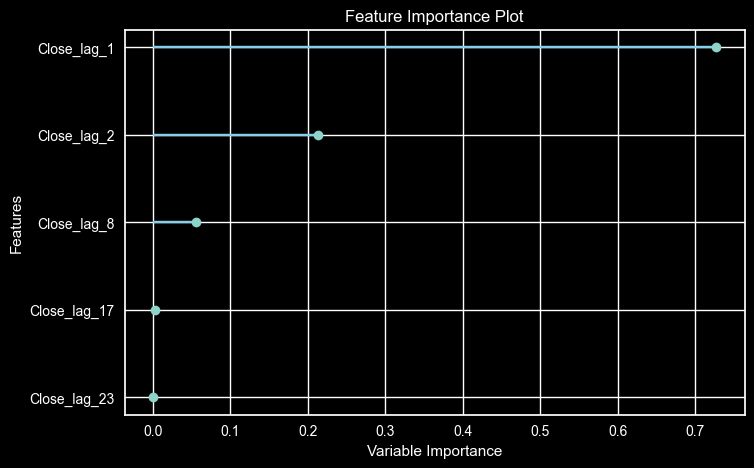

In [235]:
# Make predictions on the test set
predictions_lr = lr_mod.predict(X)
predictions_rf = rf_mod.predict(X)

# Plot the residuals
plot_model(lr_mod, plot = 'residuals')
plot_model(rf_mod, plot = 'residuals')

# Plot the feature importance
plot_model(lr_mod, plot = 'feature')
plot_model(rf_mod, plot = 'feature')

# Models Scores and Accuracy:

### My Models:

- Linear Regression
-- MSE 1.35
-- R2 0.99

- Randomforest Regressor
-- MSE 0.45
-- R2 0.99
-- MAE 0.25

### PyCaret Models:

- Linear Regression
-- MSE 2.8
-- R2 0.99

- Randomforest Regressor
-- MSE 2.86
-- R2 0.99
-- MAE 1.05

# [X] Which Model performed best by Score?

#### The Random Forest Regressor model from PyCaret has the best score
#### Here's a breakdown of why:

- MSE: Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. Lower MSE indicates better accuracy. The Random Forest Regressor from PyCaret has the lowest MSE (0.45), suggesting it makes more accurate predictions compared to the other models.   

- R2: R-squared (R²) measures the proportion of variance explained by the model. A higher R² value indicates a better fit. All models have R² values close to 1, indicating that they explain a large portion of the variance in the data. However, the Random Forest Regressor from PyCaret has the highest R² (0.99), suggesting it fits the data slightly better.

- MAE: Mean Absolute Error (MAE) measures the average absolute difference between predicted and actual values. Lower MAE indicates better accuracy. The Random Forest Regressor from PyCaret has the lowest MAE (0.25), suggesting it makes more accurate predictions in terms of absolute errors.

## Lets put RF to test ?

In [240]:
rf_mod = tune_model(rf_mod)
# Predict the next 5 closing prices
last_row = df.iloc[-1]

# DataFrame to hold the predictions
future_predictions = []

# Predict next 5 days
for _ in range(5):
    # last available data
    next_price = rf_mod.predict([last_row[:-1]]) 
    future_predictions.append(next_price[0])
    
    last_row = last_row.shift(-1) 
    last_row['Close'] = next_price[0]

# DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')  # Business
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

print(future_df)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1079,4.5027,2.1219,0.9981,0.0195,0.0128
1,0.9697,2.2239,1.4913,0.9992,0.0159,0.0118
2,0.8973,1.8737,1.3688,0.9993,0.0149,0.0112
3,0.9577,2.5299,1.5906,0.9989,0.0151,0.0114
4,0.9179,2.1082,1.4520,0.9992,0.0143,0.0105
5,1.0791,2.7752,1.6659,0.9992,0.0173,0.0120
6,1.0271,2.5297,1.5905,0.9990,0.0152,0.0119
7,1.1282,3.6442,1.9090,0.9985,0.0174,0.0125
8,1.2277,3.5004,1.8709,0.9988,0.0161,0.0127


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
            Predicted Close
2024-10-07       254.280600
2024-10-08       254.181098
2024-10-09       255.671098
2024-10-10       256.043299
2024-10-11       229.926600


# [X] How can we use our prediction models to make informed investment decisions?

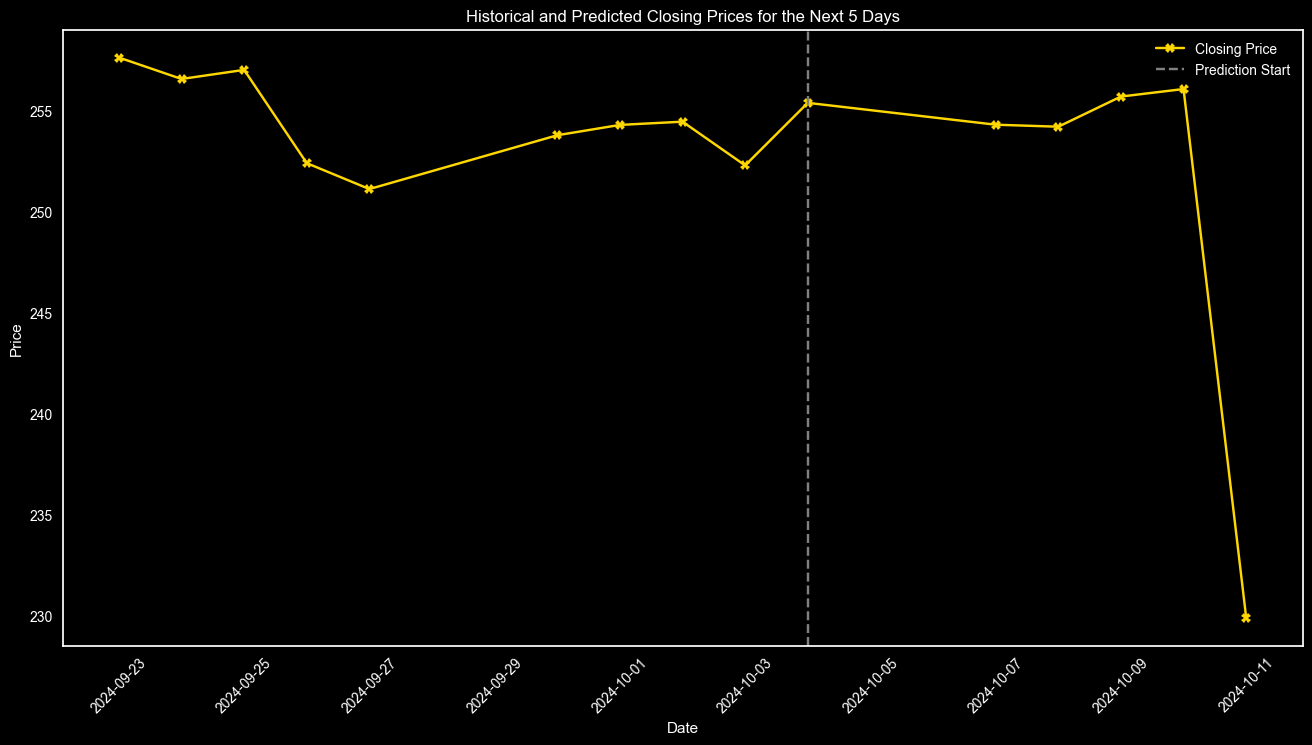

In [241]:
recent_data = df['Close'].tail(10)

# Combine historical and predicted data
combined_data = pd.concat([recent_data, future_df['Predicted Close']])

# Plot historical and predicted closing prices
plt.figure(figsize=(16, 8))
plt.plot(combined_data.index, combined_data, label='Closing Price', color='gold', marker='X')
plt.axvline(x=recent_data.index[-1], color='grey', linestyle='--', label='Prediction Start')
plt.title('Historical and Predicted Closing Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

- Model is Predicting a sharp decline to 230 in next 5 business days after reaching weekly high of 255 WOW! this is BIG news if this becomes true, it will be a huge opportunity to buy the dip. #stockmarket #trading

Conclusion: **
===========
- We now know PGR has the lowest risk stock, however it is going under short term swing and expecting a dip in next 5 days, all our models predicted downtrend and our best scoring model gave us an eye opening insight.
- This will help us to make informed decisions when and how to enter market. 